# The Notebook is divided into 4 parts:
## 1- General dataframe cleaning:
## 2- Analysis 1
## 3- Scraping & Analysis 2
## 4- Hypothesis Testing

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

# General dataframe cleaning:

In [2]:
df = pd.read_csv("Survey_2020.csv")
df.head()

Timestamp   Age Gender    City           Position   \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

  Your main technology / programming language  \
0                                  TypeScript   
1                                        Ruby   
2                     Javascript / Typescript   
3                                  Javascript   
4                                     C# .NET   

  Other technologies/programming languages you use often  ...  \
0                    Kotlin, Javascript / Typescript      ...   
1                                                NaN      ...   
2                    Javascript / Typescript, Docker      ...   
3                                                NaN      ...   
4                             .NET, SQL, AWS, Docker      ...   

   Annual bonus+stocks one year ago. Only answer if staying in same country  \
0                                              10000                          
1                                               5000                          
2                                             100000                          
3                                                NaN                          
4                                                NaN                          

  Number of vacation days           Employment status   Сontract duration  \
0                      30          Full-time employee  Unlimited contract   
1                      28          Full-time employee  Unlimited contract   
2                      30  Self-employed (freelancer)  Temporary contract   
3                      24          Full-time employee  Unlimited contract   
4                      29          Full-time employee  Unlimited contract   

  Main language at work Company size Company type  \
0               English       51-100      Product   
1               English     101-1000      Product   
2               English     101-1000      Product   
3               English       51-100      Startup   
4               English     101-1000      Product   

  Have you lost your job due to the coronavirus outbreak?  \
0                                                 No        
1                                                 No        
2                                                Yes        
3                                                 No        
4                                                 No        

  Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week  \
0                                                NaN                                                  
1                                                NaN                                                  
2                                                NaN                                                  
3                                                NaN                                                  
4                                                NaN                                                  

  Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  
0                                                NaN                                    

In [3]:
df.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [4]:
##GENERAL DATAFRAME CLEANING
#Drop last 2 columns(Irrelevant info)
#Remove all outliers in position titles that have occurred less than three
#Remove all outliers in salary by quantiling
#Change null bonus values to 0 in 'Yearly Bonus'
#Drop brutto salary and bonus one year ago(Too many null values make the info irrelevant)

df.drop(['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR','Annual bonus+stocks one year ago. Only answer if staying in same country', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'], axis=1)
df.rename(columns = {"Position ":"Position"})

q1 = df['Yearly brutto salary (without bonus and stocks) in EUR'].quantile(0.25)
q3 = df['Yearly brutto salary (without bonus and stocks) in EUR'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Yearly brutto salary (without bonus and stocks) in EUR'] >= lower_bound) & (df['Yearly brutto salary (without bonus and stocks) in EUR'] <= upper_bound)]


In [5]:
print(df.iloc[3]['Yearly brutto salary (without bonus and stocks) in EUR'])
df['Yearly bonus + stocks in EUR'] = df['Yearly bonus + stocks in EUR'].fillna(0)

62000.0


In [6]:
df['Yearly bonus + stocks in EUR'].isna().sum()

0

In [7]:
df['Position '].unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Software Architect', 'Team Lead',
       'Test manager', 'QA Engineer', 'Hardware Engineer',
       'Data Scientist', 'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Reporting Engineer', 'Account Managet',
       'agile master ', 'Solution Architect', 'BI Consultant',
       'Fullstack Developer', 'System Administrator', 'Project Manager',
       'Network Engineer ', 'VP Engineering', 'Agile Coach',
       'ML Engineer', 'Data Science Manager', 'Scrum Master',
       'Firmware Engineer', 'Solutions Architect', 'Data Center Manager',
       'C/C++/Java developer', 'DevOps Manager', 'Tech Lead',
       'Network Administrator', 'Security Manager',
       'Consultant Data Analytics', 'BI IT Consultant',
       'Graphic Designer', 'iOS Developer', 'Banker', 'Cloud Engineer',
       'Solutions

In [8]:
jobs = [df['Position '].value_counts()]

In [9]:
jobs

[Software Engineer            365
 Backend Developer            163
 Data Scientist               102
 Frontend Developer            86
 QA Engineer                   69
                             ... 
 Recruiter                      1
 DBA                            1
 DB developer/Data analyst      1
 Stuttgart                      1
 IT Operations Manager          1
 Name: Position , Length: 134, dtype: int64]

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
df.drop(['Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'], axis=1, inplace=True)

In [12]:
df['Position '].unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Software Architect', 'Team Lead',
       'Test manager', 'QA Engineer', 'Hardware Engineer',
       'Data Scientist', 'Engineering Manager', 'Analytics engineer',
       'Localization producer', 'Reporting Engineer', 'Account Managet',
       'agile master ', 'Solution Architect', 'BI Consultant',
       'Fullstack Developer', 'System Administrator', 'Project Manager',
       'Network Engineer ', 'VP Engineering', 'Agile Coach',
       'ML Engineer', 'Data Science Manager', 'Scrum Master',
       'Firmware Engineer', 'Solutions Architect', 'Data Center Manager',
       'C/C++/Java developer', 'DevOps Manager', 'Tech Lead',
       'Network Administrator', 'Security Manager',
       'Consultant Data Analytics', 'BI IT Consultant',
       'Graphic Designer', 'iOS Developer', 'Banker', 'Cloud Engineer',
       'Solutions

In [13]:
df['Yearly brutto salary (without bonus and stocks) in EUR'].min()

27000.0

In [14]:
mask = df.groupby('Position ')['Position '].transform('size') >= 3
df = df.loc[mask,:]

In [15]:
df['Position '].unique()

array(['Software Engineer', 'Backend Developer', 'Frontend Developer',
       'DevOps', 'Data Engineer', 'Designer (UI/UX)', 'Product Manager',
       'Mobile Developer', 'Team Lead', 'QA Engineer',
       'Hardware Engineer', 'Data Scientist', 'Engineering Manager',
       'Fullstack Developer', 'ML Engineer', 'Business Analyst',
       'Consultant', 'SRE', 'Data Analyst', 'CTO'], dtype=object)

# ---------------------------------------------------------------------------------------------------------------

# PROJECT 1

# Question 5: (Karim 156422)
# Which job title values years of experience the most?

(This question may be solved by comparing employee’s job titles salaries 
relative to their total years of experience. The goal of this question is to find which job title provides the highest income in the long run.)

In [80]:
df2 = df.drop(['Timestamp', 'Gender', 'City', 'Years of experience in Germany',
       'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?', 'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Age', 'Seniority level'], axis=1)
#df2

### The two functions will be used to extract the needed features and their values from the cleaned dataset.
### These functions will be called with every job position.

- The 'extractSalaries' function divides the chosen job position records into categories based on their years of experiences. Each category is represented in a data frame. The five categories are:

                >> From 0 to 4           
                >> From 4 to 8
                >> From 8 to 12
                >> From 12 to 16
                >> From 16 to 20
                >> Over 20 years of experience
                
- After that the minumum and maximum salary values for each 'Years of experience' category are retrieved and put into lists.
- Then their averages are calculated and added to each corresponding years of experience category.

- Finally, all the data frames are outer merged into one. This outputs a new data frame that combines all divided records and their relevant data for each job position.

In [81]:
def setJobPosition(s):
    df4 = df2.where(df2['Position '] == s)
    df4 = df4.dropna(axis=0, how="any")
    return df4
    
def extractSalaries(df4):
    arr1 = df4['Total years of experience'].to_numpy()
    i1 = np.where(arr1 == 'less than year')
    arr1[i1] = 0

    i1 = np.where(arr1 == '1,5')
    arr1[i1] = 0

    i1 = np.where(arr1 == '6 (not as a data scientist, but as a lab scientist)')
    arr1[i1] = 6

    i1 = i1 = np.where(arr1 == '1 (as QA Engineer) / 11 in total')
    arr1[i1] = 11

    arr1 = arr1.astype(float)
    
    z = len(df4.index)
    
    df4['id'] = [x for x in range(z)]

    df4['Total years of experience'] = arr1

    df5 = df4.where(df4['Total years of experience'] >= 0)
    df6 = df5.where(df5['Total years of experience'] < 4)
    df6['Years of XP'] = ["0 to 4" for x in range(z)]


    df5 = df4.where(df4['Total years of experience'] >= 4)
    df7 = df5.where(df5['Total years of experience'] < 8)
    df7['Years of XP'] = ["4 to 8" for x in range(z)]


    df5 = df4.where(df4['Total years of experience'] >= 8)
    df8 = df5.where(df5['Total years of experience'] < 12)
    df8['Years of XP'] = ["8 to 12" for x in range(z)]


    df5 = df4.where(df4['Total years of experience'] >= 12)
    df9 = df5.where(df5['Total years of experience'] < 16)
    df9['Years of XP'] = ["12 to 16" for x in range(z)]


    df5 = df4.where(df4['Total years of experience'] >= 16)
    df10 = df5.where(df5['Total years of experience'] < 20)
    df10['Years of XP'] = ["16 to 20" for x in range(z)]


    df11 = df4.where(df4['Total years of experience'] >= 20)
    df11['Years of XP'] = ["Over 20" for x in range(z)]

    listminSE = []
    listmaxSE = []
    listavgSE = []

    listminSE.append(df6['Yearly brutto salary (without bonus and stocks) in EUR'].min())
    listmaxSE.append(df6['Yearly brutto salary (without bonus and stocks) in EUR'].max())

    listminSE.append(df7['Yearly brutto salary (without bonus and stocks) in EUR'].min())
    listmaxSE.append(df7['Yearly brutto salary (without bonus and stocks) in EUR'].max())

    listminSE.append(df8['Yearly brutto salary (without bonus and stocks) in EUR'].min())
    listmaxSE.append(df8['Yearly brutto salary (without bonus and stocks) in EUR'].max())

    listminSE.append(df9['Yearly brutto salary (without bonus and stocks) in EUR'].min())
    listmaxSE.append(df9['Yearly brutto salary (without bonus and stocks) in EUR'].max())

    listminSE.append(df10['Yearly brutto salary (without bonus and stocks) in EUR'].min())
    listmaxSE.append(df10['Yearly brutto salary (without bonus and stocks) in EUR'].max())

    listminSE.append(df11['Yearly brutto salary (without bonus and stocks) in EUR'].min())
    listmaxSE.append(df11['Yearly brutto salary (without bonus and stocks) in EUR'].max())


    values1 = range(6)

    for i in values1:
        listavgSE.append((listminSE[i] + listmaxSE[i])/2)

    df6['Average Salary'] = [listavgSE[0] for i in range(z)]
    df7['Average Salary'] = [listavgSE[1] for i in range(z)]
    df8['Average Salary'] = [listavgSE[2] for i in range(z)]
    df9['Average Salary'] = [listavgSE[3] for i in range(z)]
    df10['Average Salary'] = [listavgSE[4] for i in range(z)]
    df11['Average Salary'] = [listavgSE[5] for i in range(z)]

    df6 = df6.dropna(axis=0, how="any")
    df7 = df7.dropna(axis=0, how="any")
    df8 = df8.dropna(axis=0, how="any")
    df9 = df9.dropna(axis=0, how="any")
    df10 = df10.dropna(axis=0, how="any")
    df11=df11.dropna(axis=0, how="any")
    
    df12 = pd.merge(df6, df7, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
    df13 = pd.merge(df8, df9, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
    df14 = pd.merge(df10, df11, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
    df15 = pd.merge(df12, df13, 'outer')
    df16 = pd.merge(df15, df14, 'outer')
    return df16

# SOFTWARE ENGINEER

In [82]:
#df4 = df2.where(df2['Position '] == "Software Engineer")
#df4 = df4.dropna(axis=0, how="any")
df4 = setJobPosition("Software Engineer")
df4

Position  Total years of experience  \
0     Software Engineer                         5   
9     Software Engineer                        15   
11    Software Engineer                        25   
13    Software Engineer                        14   
22    Software Engineer                         5   
24    Software Engineer                        17   
30    Software Engineer                         6   
33    Software Engineer                         8   
34    Software Engineer                         8   
37    Software Engineer                         8   
41    Software Engineer                        15   
43    Software Engineer                        12   
44    Software Engineer                         6   
45    Software Engineer                        25   
49    Software Engineer                         7   
56    Software Engineer                        11   
58    Software Engineer                         5   
59    Software Engineer                        40   
60    Software Engineer                        10   
63    Software Engineer                        13   
67    Software Engineer                        26   
69    Software Engineer                         3   
72    Software Engineer                        10   
73    Software Engineer                         7   
77    Software Engineer                         4   
78    Software Engineer                         5   
80    Software Engineer                         8   
82    Software Engineer                        10   
85    Software Engineer                         5   
86    Software Engineer                         9   
96    Software Engineer                         8   
98    Software Engineer                         7   
101   Software Engineer                        10   
103   Software Engineer                        10   
104   Software Engineer                         3   
108   Software Engineer                        15   
115   Software Engineer                         5   
117   Software Engineer                         8   
122   Software Engineer                         6   
126   Software Engineer                         9   
130   Software Engineer                        10   
136   Software Engineer                        13   
137   Software Engineer                        20   
140   Software Engineer                        12   
144   Software Engineer                         7   
148   Software Engineer                        12   
153   Software Engineer                        20   
155   Software Engineer                         8   
156   Software Engineer                        10   
157   Software Engineer                        11   
159   Software Engineer                         7   
170   Software Engineer                         9   
172   Software Engineer                         8   
177   Software Engineer                        14   
180   Software Engineer                        11   
181   Software Engineer                        14   
194   Software Engineer                         7   
196   Software Engineer                        13   
198   Software Engineer                        15   
200   Software Engineer                         8   
201   Software Engineer                         9   
203   Software Engineer                         7   
206   Software Engineer                         6   
207   Software Engineer                        20   
208   Software Engineer                        16   
209   Software Engineer                         5   
211   Software Engineer                        12   
224   Software Engineer                        15   
229   Software Engineer                        11   
230   Software Engineer                         3   
231   Software Engineer                         2   
232   Software Engineer                         9   
236   Software Engineer                         8   
238   Software Engineer                         7   
239   Software Engineer                

In [83]:
dff = extractSalaries(df4)

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

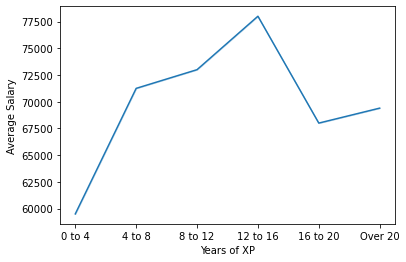

In [84]:
sns.lineplot(data=dff, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for Software Engineers.

# BACKEND DEVELOPER

In [85]:
df4 = setJobPosition("Backend Developer")
df4

Position  Total years of experience  \
1     Backend Developer                         7   
4     Backend Developer                        17   
8     Backend Developer                         8   
15    Backend Developer                         5   
16    Backend Developer                         7   
18    Backend Developer                         8   
23    Backend Developer                        30   
31    Backend Developer                         5   
38    Backend Developer                         5   
47    Backend Developer                         3   
48    Backend Developer                        12   
50    Backend Developer                        10   
53    Backend Developer                         8   
54    Backend Developer                        12   
61    Backend Developer                         5   
71    Backend Developer                        15   
75    Backend Developer                         5   
99    Backend Developer                         8   
100   Backend Developer                         7   
112   Backend Developer                        12   
114   Backend Developer                         8   
119   Backend Developer                        11   
129   Backend Developer                        12   
132   Backend Developer                         5   
133   Backend Developer                        19   
139   Backend Developer                         6   
150   Backend Developer                         4   
161   Backend Developer                         5   
167   Backend Developer                         4   
168   Backend Developer                         6   
175   Backend Developer                         5   
178   Backend Developer                        18   
213   Backend Developer                         5   
217   Backend Developer                         5   
219   Backend Developer                         6   
223   Backend Developer                        10   
226   Backend Developer                         4   
243   Backend Developer                        15   
256   Backend Developer                         8   
261   Backend Developer                        11   
266   Backend Developer                        12   
267   Backend Developer                         5   
270   Backend Developer                         9   
276   Backend Developer                        12   
278   Backend Developer                         7   
290   Backend Developer                        21   
294   Backend Developer                         7   
299   Backend Developer                         7   
302   Backend Developer                         7   
312   Backend Developer                        15   
323   Backend Developer                        11   
325   Backend Developer                         7   
336   Backend Developer                         4   
338   Backend Developer                         8   
346   Backend Developer                        18   
350   Backend Developer                         3   
358   Backend Developer                         5   
360   Backend Developer                         5   
364   Backend Developer                        11   
367   Backend Developer                         4   
374   Backend Developer                         8   
379   Backend Developer                         5   
390   Backend Developer                         5   
397   Backend Developer                        10   
406   Backend Developer                        11   
407   Backend Developer                        10   
411   Backend Developer                         9   
415   Backend Developer                         8   
422   Backend Developer                         4   
424   Backend Developer                        20   
430   Backend Developer                         3   
443   Backend Developer                         3   
455   Backend Developer                         2   
493   Backend Developer                        14   
555   Backend Developer                

In [86]:
dff2 = extractSalaries(df4)

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

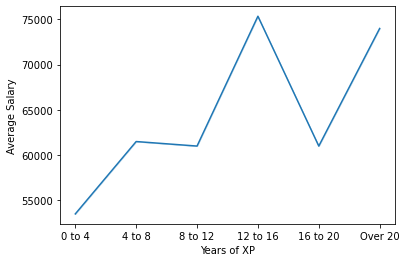

In [87]:
sns.lineplot(data=dff2, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for Backend Developers.

# DATA SCIENTIST

In [88]:
df4 = setJobPosition("Data Scientist")
dff3 = extractSalaries(df4)
dff3

Position   Total years of experience  \
0    Data Scientist                       3.00   
1    Data Scientist                       3.00   
2    Data Scientist                       2.00   
3    Data Scientist                       2.00   
4    Data Scientist                       3.00   
5    Data Scientist                       2.00   
6    Data Scientist                       1.00   
7    Data Scientist                       2.00   
8    Data Scientist                       2.00   
9    Data Scientist                       2.00   
10   Data Scientist                       1.00   
11   Data Scientist                       2.00   
12   Data Scientist                       3.00   
13   Data Scientist                       1.00   
14   Data Scientist                       2.00   
15   Data Scientist                       1.00   
16   Data Scientist                       3.00   
17   Data Scientist                       2.00   
18   Data Scientist                       2.00   
19   Data Scientist                       0.00   
20   Data Scientist                       2.00   
21   Data Scientist                       2.00   
22   Data Scientist                       2.00   
23   Data Scientist                       2.00   
24   Data Scientist                       3.00   
25   Data Scientist                       3.00   
26   Data Scientist                       1.00   
27   Data Scientist                       2.50   
28   Data Scientist                       1.50   
29   Data Scientist                       2.00   
30   Data Scientist                       6.00   
31   Data Scientist                       4.00   
32   Data Scientist                       4.00   
33   Data Scientist                       5.50   
34   Data Scientist                       5.00   
35   Data Scientist                       4.00   
36   Data Scientist                       4.00   
37   Data Scientist                       7.00   
38   Data Scientist                       4.00   
39   Data Scientist                       4.00   
40   Data Scientist                       5.00   
41   Data Scientist                       5.00   
42   Data Scientist                       4.00   
43   Data Scientist                       5.00   
44   Data Scientist                       6.00   
45   Data Scientist                       6.00   
46   Data Scientist                       4.00   
47   Data Scientist                       6.00   
48   Data Scientist                       6.00   
49   Data Scientist                       5.00   
50   Data Scientist                       6.00   
51   Data Scientist                       6.00   
52   Data Scientist                       6.00   
53   Data Scientist                       4.00   
54   Data Scientist                       5.00   
55   Data Scientist                       5.00   
56   Data Scientist                       4.00   
57   Data Scientist                       4.00   
58   Data Scientist                       6.00   
59   Data Scientist                       5.00   
60   Data Scientist                       5.00   
61   Data Scientist                       4.00   
62   Data Scientist                       5.00   
63   Data Scientist                       5.00   
64   Data Scientist                       5.00   
65   Data Scientist                       5.00   
66   Data Scientist                       6.00   
67   Data Scientist                       5.00   
68   Data Scientist                       4.00   
69   Data Scientist                       6.00   
70   Data Scientist                       5.00   
71   Data Scientist                       5.00   
72   Data Scientist                       5.00   
73   Data Scientist                       5.00   
74   Data Scientist                       4.00   
75   Data Scientist                       6.00   
76   Data Scientist                       7.00   
77   Data Scientist                       4.50   
78   Data Scientist                       6.00   
79   Data 

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

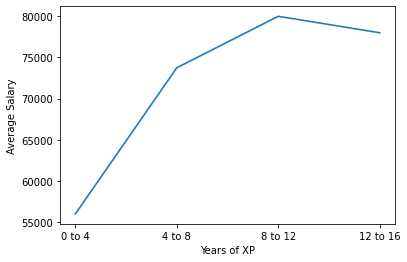

In [89]:
sns.lineplot(data=dff3, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for Data Scientists.

# FRONTEND DEVELOPER

In [90]:
df4 = setJobPosition("Frontend Developer")
dff4 = extractSalaries(df4)
dff4

Position   Total years of experience  \
0   Frontend Developer                       1.00   
1   Frontend Developer                       3.00   
2   Frontend Developer                       3.00   
3   Frontend Developer                       2.00   
4   Frontend Developer                       2.00   
5   Frontend Developer                       3.00   
6   Frontend Developer                       3.00   
7   Frontend Developer                       3.00   
8   Frontend Developer                       2.00   
9   Frontend Developer                       3.00   
10  Frontend Developer                       4.00   
11  Frontend Developer                       6.00   
12  Frontend Developer                       5.00   
13  Frontend Developer                       7.00   
14  Frontend Developer                       5.00   
15  Frontend Developer                       7.00   
16  Frontend Developer                       7.00   
17  Frontend Developer                       6.00   
18  Frontend Developer                       7.00   
19  Frontend Developer                       4.00   
20  Frontend Developer                       4.00   
21  Frontend Developer                       5.00   
22  Frontend Developer                       4.00   
23  Frontend Developer                       7.00   
24  Frontend Developer                       5.00   
25  Frontend Developer                       4.00   
26  Frontend Developer                       6.00   
27  Frontend Developer                       6.00   
28  Frontend Developer                       7.00   
29  Frontend Developer                       4.00   
30  Frontend Developer                       7.00   
31  Frontend Developer                       6.00   
32  Frontend Developer                       5.00   
33  Frontend Developer                       6.00   
34  Frontend Developer                       6.00   
35  Frontend Developer                       6.00   
36  Frontend Developer                       4.00   
37  Frontend Developer                       6.00   
38  Frontend Developer                       6.00   
39  Frontend Developer                       5.00   
40  Frontend Developer                       5.00   
41  Frontend Developer                       5.00   
42  Frontend Developer                       5.00   
43  Frontend Developer                       7.00   
44  Frontend Developer                       4.00   
45  Frontend Developer                       7.00   
46  Frontend Developer                       5.00   
47  Frontend Developer                       5.00   
48  Frontend Developer                       6.00   
49  Frontend Developer                       5.00   
50  Frontend Developer                       7.00   
51  Frontend Developer                      10.00   
52  Frontend Developer                       8.00   
53  Frontend Developer                      10.00   
54  Frontend Developer                       8.00   
55  Frontend Developer                      10.00   
56  Frontend Developer                       9.00   
57  Frontend Developer                       8.00   
58  Frontend Developer                       8.00   
59  Frontend Developer                       8.00   
60  Frontend Developer                      10.00   
61  Frontend Developer                       8.00   
62  Frontend Developer                       8.00   
63  Frontend Developer                      10.00   
64  Frontend Developer                      11.00   
65  Frontend Developer                       9.00   
66  Frontend Developer                       8.00   
67  Frontend Developer                       8.00   
68  Frontend Developer                      10.00   
69  Frontend Developer                      10.00   
70  Frontend Developer                       8.00   
71  Frontend Developer                      10.00   
72  Frontend Developer                      10.00   
73  Frontend Developer                       9.00   
74  Frontend Developer                

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

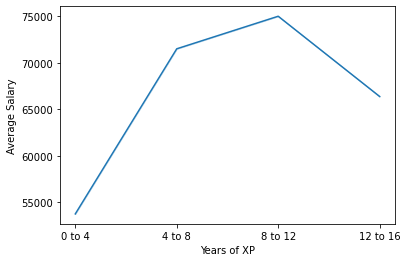

In [91]:
sns.lineplot(data=dff4, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for Frontend Developers.

# QA ENGINEER

In [92]:
df4 = setJobPosition("QA Engineer")
dff5 = extractSalaries(df4)
dff5

Position   Total years of experience  \
0   QA Engineer                       3.00   
1   QA Engineer                       2.00   
2   QA Engineer                       7.00   
3   QA Engineer                       5.00   
4   QA Engineer                       6.00   
5   QA Engineer                       5.00   
6   QA Engineer                       6.00   
7   QA Engineer                       6.00   
8   QA Engineer                       7.00   
9   QA Engineer                       6.00   
10  QA Engineer                       5.00   
11  QA Engineer                       6.00   
12  QA Engineer                       6.00   
13  QA Engineer                       6.50   
14  QA Engineer                       7.00   
15  QA Engineer                       4.00   
16  QA Engineer                       6.00   
17  QA Engineer                       6.00   
18  QA Engineer                       5.00   
19  QA Engineer                       7.00   
20  QA Engineer                       5.00   
21  QA Engineer                       6.00   
22  QA Engineer                       5.00   
23  QA Engineer                       5.00   
24  QA Engineer                       7.00   
25  QA Engineer                       5.00   
26  QA Engineer                       7.00   
27  QA Engineer                       4.00   
28  QA Engineer                       6.00   
29  QA Engineer                       5.00   
30  QA Engineer                       7.00   
31  QA Engineer                       8.00   
32  QA Engineer                      10.00   
33  QA Engineer                      10.00   
34  QA Engineer                       8.00   
35  QA Engineer                       9.00   
36  QA Engineer                      10.00   
37  QA Engineer                       9.00   
38  QA Engineer                       9.00   
39  QA Engineer                       9.00   
40  QA Engineer                      11.00   
41  QA Engineer                      11.00   
42  QA Engineer                      11.00   
43  QA Engineer                      10.00   
44  QA Engineer                      10.00   
45  QA Engineer                      10.00   
46  QA Engineer                       9.00   
47  QA Engineer                      10.00   
48  QA Engineer                       8.00   
49  QA Engineer                       8.00   
50  QA Engineer                       8.00   
51  QA Engineer                      10.00   
52  QA Engineer                       8.00   
53  QA Engineer                       9.00   
54  QA Engineer                      11.00   
55  QA Engineer                       8.00   
56  QA Engineer                       9.00   
57  QA Engineer                      10.00   
58  QA Engineer                       8.00   
59  QA Engineer                      11.00   
60  QA Engineer                       8.00   
61  QA Engineer                      13.00   
62  QA Engineer                      14.00   
63  QA Engineer                      12.00   
64  QA Engineer                      12.00   
65  QA Engineer                      15.00   
66  QA Engineer                      18.00   
67  QA Engineer                      16.00   
68  QA Engineer                      20.00   

    Yearly brutto salary (without bonus and stocks) in EUR    id Years of XP  \
0                                            55000.00      56.00      0 to 4   
1                                            32000.00      59.00      0 to 4   
2                                            45000.00       0.00      4 to 8   
3                                            60000.00       3.00      4 to 8   
4                                            62000.00       4.00      4 to 8   
5                                            58000.00       5.00      4 to 8   
6                                            50000.00       6.00      4 to 8   
7                                            65000.00       7.00      4 to 8   
8                                            68000.00       9.00 

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

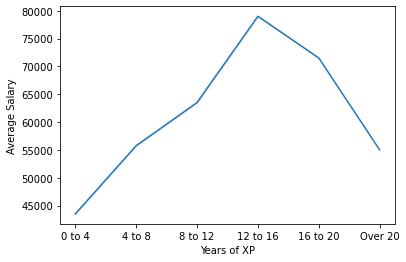

In [93]:
sns.lineplot(data=dff5, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for QA Engineers.

# DEVOPS

In [94]:
df4 = setJobPosition("DevOps")
dff6 = extractSalaries(df4)
#dff6

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

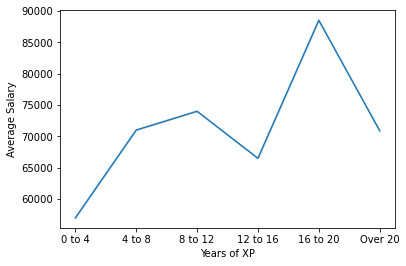

In [95]:
sns.lineplot(data=dff6, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for DevOps Engineers.

# MOBILE DEVELOPER

In [96]:
df4 = setJobPosition("Mobile Developer")
dff7 = extractSalaries(df4)
#dff7

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

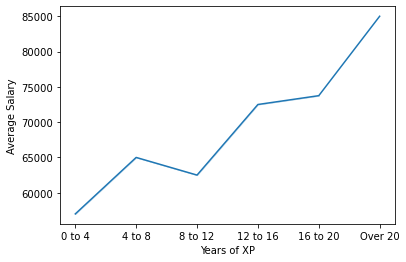

In [97]:
sns.lineplot(data=dff7, x='Years of XP', y='Average Salary')

### The outcome shows the average distribution of salaries with respect to the years of experience for Mobile Developers.

# ALL

### The resulting dataframes for each job position are outer merged with each other to obtain one inclusive dataframe that holds the categorical years of experience, main and average salaries.
### This dataframe will be the final one to visualize a comparison among all analyzed job positions.

In [98]:
df23 = pd.merge(dff, dff2, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
df24 = pd.merge(dff3, dff4, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
df25 = pd.merge(dff5, dff6, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
df26 = pd.merge(df23, df24, 'outer',on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
df27 = pd.merge(df25, df26, 'outer',on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
df28 = pd.merge(df27, dff7, 'outer', on=['id', 'Position ', 'Years of XP', 'Total years of experience', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Average Salary'])
#df27

<AxesSubplot:xlabel='Years of XP', ylabel='Average Salary'>

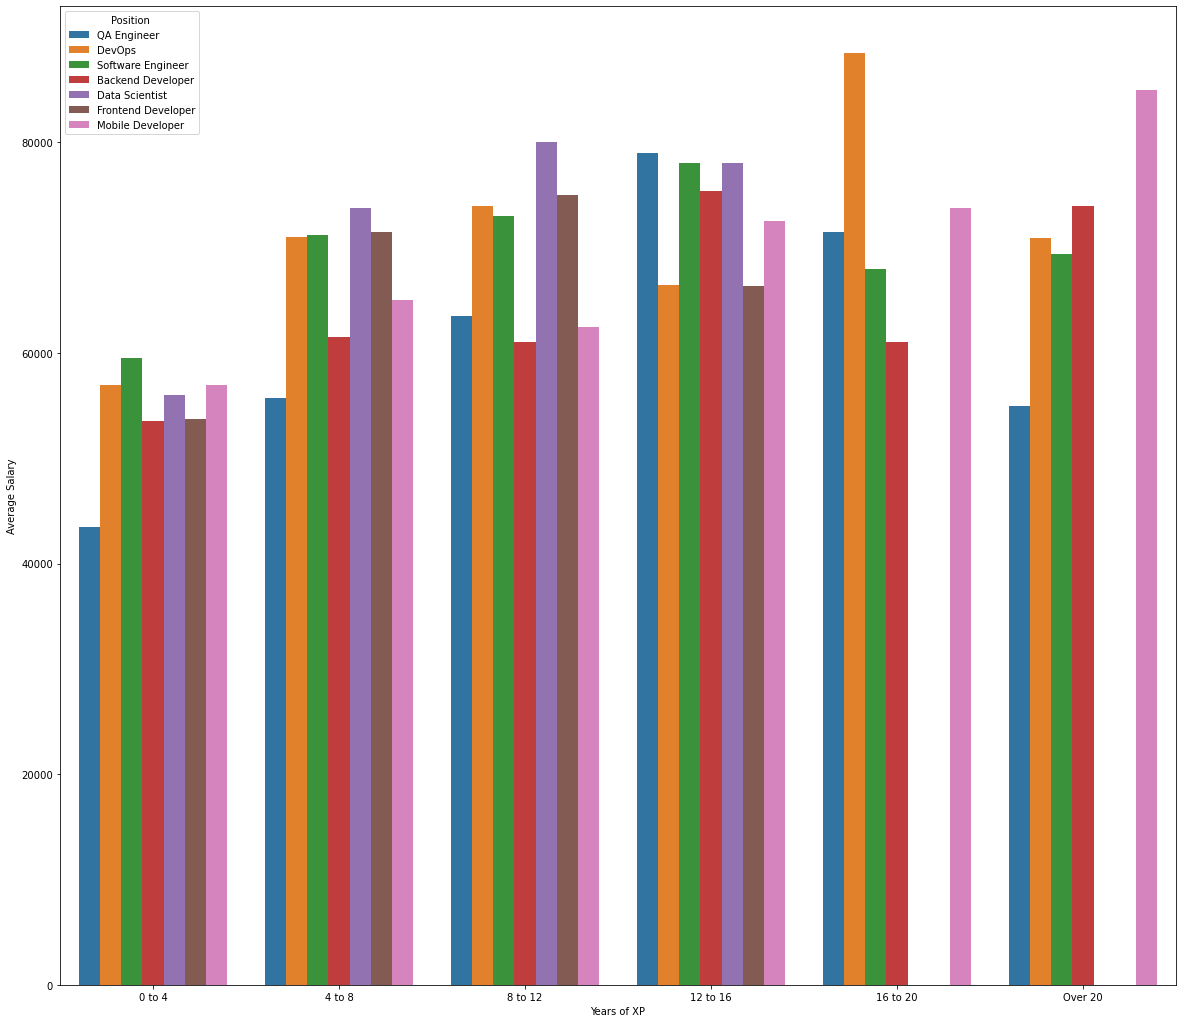

In [99]:
plt.rcParams['figure.figsize']=(20,18)
sns.barplot(data = df28, x="Years of XP", y="Average Salary", hue = 'Position ')

## From the obtained dataset, the final chart shows that:

- All job positions except DevOps positions appear progressive for young tech employees looking to spend over a decade in those fields.
- DevOps postions' salaries appears more within range for tech employees having over 4 years of experience.
- 'Mobile Development' job position seems the only position that values years of experience as the peak salary coincides with the maximum experience years. This is not the case with the rest of job positions.
- Most of the job positions have peak average salaries at "12-16" years of experience and most of them have dropping salaries at the maximum years of experience.

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# PROJECT 2

# Question 1: (Karim 156422)
# Considering Europe-based Mobile Developers and Software Engineers, what are their chances of finding a similar job opportunity in Singapore satisfying its exact job requirements?

In [100]:
import requests
from bs4 import BeautifulSoup

### The two functions are used to scrape data from a job listing website in Singapore.
### The scrapePage function extracts the job title as well as the company name and calls the getMore function which gets two inner details of each job reqirement: Career Level and Years of Experience. 

In [101]:
jobTitle=[] 
Company=[] #Company Name
cLevel=[] #Career Level
YXP=[] #Years of Experience required for the job

def getMore(f): #'f' is the 'href' link for each job offer. The link goes to another webpage that has extra required details for the job.
    req2 = requests.get(f)
    con2 = BeautifulSoup(req2.text, 'html.parser')
    z = con2.find('div', 'z1s6m00 _1hbhsw66y _1hbhsw673 _1hbhsw674 _1hbhsw682 _1hbhsw687 _1hbhsw688 _1hbhsw69q _1hbhsw68m y44q7i18 y44q7i1b _1hbhsw632 _1hbhsw635').find('div', 'z1s6m00 _5135ge0 _5135ge7 _5135gei').find('div', 'z1s6m00 _1hbhsw65a _1hbhsw6gi _5135ge2f').find_all('div', 'z1s6m00 _1hbhsw6r pmwfa50 pmwfa57')
    zf = z[0].find_all('div', 'z1s6m00 _1hbhsw66q')
    zz = zf[1].find('span').text.strip()
    cLevel.append(zz)
    zz = z[2].find_all('div', 'z1s6m00 _1hbhsw66q')
    zzz = zz[1].find('span').text.strip()
    YXP.append(zzz)



def scrapePage(page, pos):  #'page' is an integer, and 'pos' is a string that represents the job position.
    req = requests.get(f"https://www.jobstreet.com.sg/{pos}-jobs?persist=specialization&pg={page}&specialization=508")
    con = req.text
    con = BeautifulSoup(con, 'html.parser')
    a = con.find('div', 'z1s6m00 iw87102').find('div', 'z1s6m00 _1hbhsw6ce').find('div', 'z1s6m00')
    b = a.find_all('div', 'z1s6m00 _1hbhsw69y _1hbhsw68u _1hbhsw67e _1hbhsw67q')
    for item in b:
        c = item.find('div', 'z1s6m00')
        d = c.find('h1').text.strip()
        t = c.find('h1').find('a').get('href')
        e = c.find('span', 'z1s6m00 _17dyj7u1 _1hbhsw64y _1hbhsw60 _1hbhsw6r').text.strip()
        getMore(f"https://www.jobstreet.com.sg{t}") #Passing the link to the getMore function to scrape more details about the job.
        jobTitle.append(d)
        Company.append(e)        

In [102]:
i = 2 
for i in range(15): #Scraping over 12 pages of job listings in Singapore for mobile developers and software engineers.
    scrapePage(i, 'mobile-developer')
    scrapePage(i, 'software-engineer')

In [103]:
jT=[]

def cleanJobTitle():  #The function aims to clean the extracted job titles using regex to match those with the main dataset.
    reg = r"([_,[#|.@()$-]).+"  #Removes special characters within the job title.
    i = 1
    for i in jobTitle:
        t = re.sub(reg, '', i)
        i = re.sub(r"\s+$", "", t)  #Removes white space at the end.
        jT.append(i) #The new job title after cleaning.

In [104]:
newYXP = []

def cleanXP():  #The function aims to clean the extracted years of experience using regex to match those with the main dataset.
    rege = r"\D+"
    i = 0
    for i in YXP:
        if i != 'Full-Time' and re.search('^\d', i):
            e = re.split(rege, i)  #The scraped years of xp are text like '2 years', this text is splitted and only the first index is taken.
            newYXP.append(int(e[0])) #There is another way of extracting it by matching with the digit directly as r"\d+"
        else:
            newYXP.append(i) #Despite useless data, just scrape to avoid messing up the records.

### Two new regex values are used to further clean the job titles to match those with the dataset and avoid redundancy. For example, An android developer, an iOS developer, a mobile app dev are all 'Mobile Developers'.

In [105]:
cleanJobTitle()
cleanXP()
o = []


reg = "(.+((Mobile)|(Android)|([iI]OS)).+)|(((Mobile)|(Android)|([iI]OS)).+)"
reg2 = "(.+(Software).+)|((Software).+)"

for i in jT:
    if re.search('(Software)+', i):
        o.append(re.sub(reg2, "Software Engineer", i))
    else:
        o.append(re.sub(reg, "Mobile Developer", i))


In [106]:
r = pd.DataFrame({'Job Title' : o, 'Company Name': Company, 'Career Level': cLevel, 'XP Years': newYXP})

In [107]:
g = ('Mobile Developer', 'Software Engineer')
r2 = r.where(r['Job Title'].isin(g))
r2 

Job Title                                       Company Name  \
0     Mobile Developer                       Peoplebank Singapore Pte Ltd   
1    Software Engineer                          Adecco Personnel Pte Ltd.   
2     Mobile Developer                                 ScienTec Personnel   
3     Mobile Developer                 Michael Page International Pte Ltd   
4                  NaN                                                NaN   
5     Mobile Developer                        Talent Trader Group Pte Ltd   
6    Software Engineer                            TRUST RECRUIT PTE. LTD.   
7    Software Engineer             Good Job Creations (Singapore) Pte Ltd   
8     Mobile Developer         HR Business Partners International Pte Ltd   
9     Mobile Developer                             GATEWAY SEARCH PTE LTD   
10    Mobile Developer  PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...   
11    Mobile Developer                                 MiChat Pte Limited   
12    Mobile Developer                       OSIM International Pte. Ltd.   
13    Mobile Developer                              OCBC Bank (Singapore)   
14                 NaN                                                NaN   
15    Mobile Developer                              OCBC Bank (Singapore)   
16   Software Engineer                                             TikTok   
17   Software Engineer                                             TikTok   
18    Mobile Developer                              OCBC Bank (Singapore)   
19   Software Engineer                                             TikTok   
20    Mobile Developer                              OCBC Bank (Singapore)   
21    Mobile Developer                                             TikTok   
22    Mobile Developer              Merry Electronics (Singapore) Pte Ltd   
23   Software Engineer                                             TikTok   
24    Mobile Developer   QUESS CORP SINGAPORE PTE. LTD. / QUESS SINGAPORE   
25    Mobile Developer                              OCBC Bank (Singapore)   
26    Mobile Developer                     Beyondsoft (Malaysia) Sdn.Bhd.   
27    Mobile Developer                                             TikTok   
28    Mobile Developer                     Beyondsoft (Malaysia) Sdn.Bhd.   
29                 NaN                                                NaN   
30   Software Engineer                                  Fleischhacker LLP   
31   Software Engineer                   Yamazaki Mazak Singapore Pte Ltd   
32   Software Engineer                               CrimsonLogic Pte Ltd   
33   Software Engineer                       OSIM International Pte. Ltd.   
34                 NaN                                                NaN   
35   Software Engineer              GL Engineering & Construction Pte Ltd   
36   Software Engineer                           Skillup Learning Pte Ltd   
37                 NaN                                                NaN   
38   Software Engineer                            Nala Employment Pte Ltd   
39   Software Engineer                                   ABPGroup Pte Ltd   
40   Software Engineer                               HOPE Technik Pte Ltd   
41   Software Engineer                                 Scantist Pte. Ltd.   
42   Software Engineer                          Align Recruitment Pte Ltd   
43                 NaN                                                NaN   
44   Software Engineer                        ScienTec Consulting Pte Ltd   
45   Software Engineer             Good Job Creations (Singapore) Pte Ltd   
46   Software Engineer                  HIRATA FA ENGINEERING (S) PTE LTD   
47   Software Engineer                            TRUST RECRUIT PTE. LTD.   
48   Software Engineer             Good Job Creations (Singapore) Pte Ltd   
49   Software Engineer                            TRUST RECRUIT PTE. LTD.   
50   Software Engineer                           Search Personnel Pte Ltd   
51   Soft

In [108]:
r2.isnull().sum()

Job Title       280
Company Name    280
Career Level    280
XP Years        280
dtype: int64

In [109]:
r2.dropna(axis=0, how='any', inplace=True)
r2.shape

(620, 4)

In [110]:
r2 #The final dataframe with 'Mobile Developers' and 'Software Engineers'

Job Title                                       Company Name  \
0     Mobile Developer                       Peoplebank Singapore Pte Ltd   
1    Software Engineer                          Adecco Personnel Pte Ltd.   
2     Mobile Developer                                 ScienTec Personnel   
3     Mobile Developer                 Michael Page International Pte Ltd   
5     Mobile Developer                        Talent Trader Group Pte Ltd   
6    Software Engineer                            TRUST RECRUIT PTE. LTD.   
7    Software Engineer             Good Job Creations (Singapore) Pte Ltd   
8     Mobile Developer         HR Business Partners International Pte Ltd   
9     Mobile Developer                             GATEWAY SEARCH PTE LTD   
10    Mobile Developer  PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...   
11    Mobile Developer                                 MiChat Pte Limited   
12    Mobile Developer                       OSIM International Pte. Ltd.   
13    Mobile Developer                              OCBC Bank (Singapore)   
15    Mobile Developer                              OCBC Bank (Singapore)   
16   Software Engineer                                             TikTok   
17   Software Engineer                                             TikTok   
18    Mobile Developer                              OCBC Bank (Singapore)   
19   Software Engineer                                             TikTok   
20    Mobile Developer                              OCBC Bank (Singapore)   
21    Mobile Developer                                             TikTok   
22    Mobile Developer              Merry Electronics (Singapore) Pte Ltd   
23   Software Engineer                                             TikTok   
24    Mobile Developer   QUESS CORP SINGAPORE PTE. LTD. / QUESS SINGAPORE   
25    Mobile Developer                              OCBC Bank (Singapore)   
26    Mobile Developer                     Beyondsoft (Malaysia) Sdn.Bhd.   
27    Mobile Developer                                             TikTok   
28    Mobile Developer                     Beyondsoft (Malaysia) Sdn.Bhd.   
30   Software Engineer                                  Fleischhacker LLP   
31   Software Engineer                   Yamazaki Mazak Singapore Pte Ltd   
32   Software Engineer                               CrimsonLogic Pte Ltd   
33   Software Engineer                       OSIM International Pte. Ltd.   
35   Software Engineer              GL Engineering & Construction Pte Ltd   
36   Software Engineer                           Skillup Learning Pte Ltd   
38   Software Engineer                            Nala Employment Pte Ltd   
39   Software Engineer                                   ABPGroup Pte Ltd   
40   Software Engineer                               HOPE Technik Pte Ltd   
41   Software Engineer                                 Scantist Pte. Ltd.   
42   Software Engineer                          Align Recruitment Pte Ltd   
44   Software Engineer                        ScienTec Consulting Pte Ltd   
45   Software Engineer             Good Job Creations (Singapore) Pte Ltd   
46   Software Engineer                  HIRATA FA ENGINEERING (S) PTE LTD   
47   Software Engineer                            TRUST RECRUIT PTE. LTD.   
48   Software Engineer             Good Job Creations (Singapore) Pte Ltd   
49   Software Engineer                            TRUST RECRUIT PTE. LTD.   
50   Software Engineer                           Search Personnel Pte Ltd   
51   Software Engineer             Good Job Creations (Singapore) Pte Ltd   
52   Software Engineer                       Jobster Pte Ltd (EA 06C5060)   
53   Software Engineer                         Goldtech Resources Pte Ltd   
54   Software Engineer                           HAN YA RECRUIT PTE. LTD.   
55   Software Engineer                                        NCS Pte Ltd   
56   Software Engineer                            TRUST RECRUIT PTE. LTD.   
57   Soft

In [111]:
r2['Career Level'].unique()

array(['Senior Executive', 'Manager', 'Junior Executive', 'Non-Executive',
       'Entry Level', 'Senior Manager', 'Not Specified'], dtype=object)

In [112]:
r2 = r2.where(r2['XP Years'] != 'Full-Time')

In [113]:
r2.dropna(axis=0, how='any', inplace=True)

### For simplifying merging with the main dataset, Career Levels of the new dataset are renamed to match the 'Seniority level' values in the main dataset.

In [114]:
r2['Career Level'] = r2['Career Level'].replace('Senior Executive', 'Senior')
r2['Career Level'] = r2['Career Level'].replace('Senior Manager', 'Senior')
r2['Career Level'] = r2['Career Level'].replace('Entry Level', 'Junior')
r2['Career Level'] = r2['Career Level'].replace('Junior Executive', 'Junior')
r2['Career Level'] = r2['Career Level'].replace('Manager', 'Head')
r2['Career Level'] = r2['Career Level'].replace('Non-Executive', 'Middle')

In [115]:
df['Seniority level'].unique()

array(['Senior', 'Junior', 'Middle', 'Lead', 'Head', nan, 'No level',
       'Principal', 'no idea, there are no ranges in the firm '],
      dtype=object)

In [116]:
r2['Career Level'].unique()

array(['Senior', 'Junior', 'Middle', 'Head', 'Not Specified'],
      dtype=object)

In [117]:
r2.drop('Company Name', axis=1, inplace=True)

In [118]:
r2.reset_index(inplace = True)

In [119]:
r2.drop('index', axis=1, inplace=True)
r2

Job Title   Career Level  \
0     Mobile Developer         Senior   
1     Mobile Developer         Junior   
2     Mobile Developer         Middle   
3     Mobile Developer         Junior   
4    Software Engineer         Junior   
5    Software Engineer         Senior   
6     Mobile Developer         Senior   
7     Mobile Developer         Middle   
8     Mobile Developer         Senior   
9     Mobile Developer         Senior   
10    Mobile Developer         Junior   
11    Mobile Developer         Senior   
12   Software Engineer         Senior   
13   Software Engineer         Junior   
14    Mobile Developer         Junior   
15   Software Engineer         Junior   
16    Mobile Developer         Junior   
17    Mobile Developer         Senior   
18    Mobile Developer         Junior   
19   Software Engineer         Junior   
20    Mobile Developer         Senior   
21    Mobile Developer         Junior   
22    Mobile Developer         Senior   
23    Mobile Developer         Senior   
24    Mobile Developer         Senior   
25   Software Engineer         Junior   
26   Software Engineer         Junior   
27   Software Engineer         Senior   
28   Software Engineer         Junior   
29   Software Engineer         Senior   
30   Software Engineer           Head   
31   Software Engineer         Junior   
32   Software Engineer         Senior   
33   Software Engineer           Head   
34   Software Engineer         Junior   
35   Software Engineer         Junior   
36   Software Engineer         Senior   
37   Software Engineer         Senior   
38   Software Engineer         Junior   
39   Software Engineer         Junior   
40   Software Engineer         Junior   
41   Software Engineer         Junior   
42   Software Engineer         Senior   
43   Software Engineer         Senior   
44   Software Engineer         Senior   
45   Software Engineer         Senior   
46   Software Engineer         Junior   
47   Software Engineer         Junior   
48   Software Engineer         Junior   
49   Software Engineer         Senior   
50   Software Engineer         Junior   
51   Software Engineer         Junior   
52    Mobile Developer         Senior   
53    Mobile Developer         Junior   
54    Mobile Developer         Middle   
55    Mobile Developer         Junior   
56   Software Engineer         Junior   
57   Software Engineer         Senior   
58    Mobile Developer         Senior   
59    Mobile Developer         Middle   
60    Mobile Developer         Senior   
61    Mobile Developer         Senior   
62    Mobile Developer         Junior   
63    Mobile Developer         Senior   
64   Software Engineer         Senior   
65   Software Engineer         Junior   
66    Mobile Developer         Junior   
67   Software Engineer         Junior   
68    Mobile Developer         Junior   
69    Mobile Developer         Senior   
70    Mobile Developer         Junior   
71   Software Engineer         Junior   
72    Mobile Developer         Senior   
73    Mobile Developer         Junior   
74    Mobile Developer         Senior   
75    Mobile Developer         Senior   
76    Mobile Developer         Senior   
77   Software Engineer         Junior   
78   Software Engineer         Junior   
79   Software Engineer         Senior   
80   Software Engineer         Junior   
81   Software Engineer         Senior   
82   Software Engineer           Head   
83   Software Engineer         Junior   
84   Software Engineer         Senior   
85   Software Engineer           Head   
86   Software Engineer         Junior   
87   Software Engineer         Junior   
88   Software Engineer         Senior   
89   Software Engineer         Senior   
90   Software Engineer         Junior   
91   Software Engineer         Junior   
92   Software Engineer         Junior   
93   Software Engineer         Junior   
94   Software Engineer         Senior   
95   Software Engineer         Senior   
96   Software Engineer         Senio

### The purpose of the new column is to count the number of ocurrences of each complete record in the scrapped dataset. This is to find, for example, how many job offers offered for a senior mobile developer with 3 years of experience in Singapore.

In [120]:
r2['Occurence'] = 0
r2

Job Title   Career Level  \
0     Mobile Developer         Senior   
1     Mobile Developer         Junior   
2     Mobile Developer         Middle   
3     Mobile Developer         Junior   
4    Software Engineer         Junior   
5    Software Engineer         Senior   
6     Mobile Developer         Senior   
7     Mobile Developer         Middle   
8     Mobile Developer         Senior   
9     Mobile Developer         Senior   
10    Mobile Developer         Junior   
11    Mobile Developer         Senior   
12   Software Engineer         Senior   
13   Software Engineer         Junior   
14    Mobile Developer         Junior   
15   Software Engineer         Junior   
16    Mobile Developer         Junior   
17    Mobile Developer         Senior   
18    Mobile Developer         Junior   
19   Software Engineer         Junior   
20    Mobile Developer         Senior   
21    Mobile Developer         Junior   
22    Mobile Developer         Senior   
23    Mobile Developer         Senior   
24    Mobile Developer         Senior   
25   Software Engineer         Junior   
26   Software Engineer         Junior   
27   Software Engineer         Senior   
28   Software Engineer         Junior   
29   Software Engineer         Senior   
30   Software Engineer           Head   
31   Software Engineer         Junior   
32   Software Engineer         Senior   
33   Software Engineer           Head   
34   Software Engineer         Junior   
35   Software Engineer         Junior   
36   Software Engineer         Senior   
37   Software Engineer         Senior   
38   Software Engineer         Junior   
39   Software Engineer         Junior   
40   Software Engineer         Junior   
41   Software Engineer         Junior   
42   Software Engineer         Senior   
43   Software Engineer         Senior   
44   Software Engineer         Senior   
45   Software Engineer         Senior   
46   Software Engineer         Junior   
47   Software Engineer         Junior   
48   Software Engineer         Junior   
49   Software Engineer         Senior   
50   Software Engineer         Junior   
51   Software Engineer         Junior   
52    Mobile Developer         Senior   
53    Mobile Developer         Junior   
54    Mobile Developer         Middle   
55    Mobile Developer         Junior   
56   Software Engineer         Junior   
57   Software Engineer         Senior   
58    Mobile Developer         Senior   
59    Mobile Developer         Middle   
60    Mobile Developer         Senior   
61    Mobile Developer         Senior   
62    Mobile Developer         Junior   
63    Mobile Developer         Senior   
64   Software Engineer         Senior   
65   Software Engineer         Junior   
66    Mobile Developer         Junior   
67   Software Engineer         Junior   
68    Mobile Developer         Junior   
69    Mobile Developer         Senior   
70    Mobile Developer         Junior   
71   Software Engineer         Junior   
72    Mobile Developer         Senior   
73    Mobile Developer         Junior   
74    Mobile Developer         Senior   
75    Mobile Developer         Senior   
76    Mobile Developer         Senior   
77   Software Engineer         Junior   
78   Software Engineer         Junior   
79   Software Engineer         Senior   
80   Software Engineer         Junior   
81   Software Engineer         Senior   
82   Software Engineer           Head   
83   Software Engineer         Junior   
84   Software Engineer         Senior   
85   Software Engineer           Head   
86   Software Engineer         Junior   
87   Software Engineer         Junior   
88   Software Engineer         Senior   
89   Software Engineer         Senior   
90   Software Engineer         Junior   
91   Software Engineer         Junior   
92   Software Engineer         Junior   
93   Software Engineer         Junior   
94   Software Engineer         Senior   
95   Software Engineer         Senior   
96   Software Engineer         Senio

In [121]:
i = 0
for i in range(len(r2)):
    j = i+1
    for j in range(len(r2)):
        if r2.loc[i, 'Career Level'] == r2.loc[j, 'Career Level'] and r2.loc[i, 'XP Years'] == r2.loc[j, 'XP Years']:
            r2.loc[i, 'Occurence'] +=1

In [122]:
r3 = r2

In [123]:
r3['XP Years'] = [str(r3['XP Years'][i]) for i in range(len(r3))]

In [124]:
r3['S+XP'] = r3['Job Title'] + "--" + r3['XP Years'] + "--" + r3['Career Level']

In [125]:
r3

Job Title   Career Level  \
0     Mobile Developer         Senior   
1     Mobile Developer         Junior   
2     Mobile Developer         Middle   
3     Mobile Developer         Junior   
4    Software Engineer         Junior   
5    Software Engineer         Senior   
6     Mobile Developer         Senior   
7     Mobile Developer         Middle   
8     Mobile Developer         Senior   
9     Mobile Developer         Senior   
10    Mobile Developer         Junior   
11    Mobile Developer         Senior   
12   Software Engineer         Senior   
13   Software Engineer         Junior   
14    Mobile Developer         Junior   
15   Software Engineer         Junior   
16    Mobile Developer         Junior   
17    Mobile Developer         Senior   
18    Mobile Developer         Junior   
19   Software Engineer         Junior   
20    Mobile Developer         Senior   
21    Mobile Developer         Junior   
22    Mobile Developer         Senior   
23    Mobile Developer         Senior   
24    Mobile Developer         Senior   
25   Software Engineer         Junior   
26   Software Engineer         Junior   
27   Software Engineer         Senior   
28   Software Engineer         Junior   
29   Software Engineer         Senior   
30   Software Engineer           Head   
31   Software Engineer         Junior   
32   Software Engineer         Senior   
33   Software Engineer           Head   
34   Software Engineer         Junior   
35   Software Engineer         Junior   
36   Software Engineer         Senior   
37   Software Engineer         Senior   
38   Software Engineer         Junior   
39   Software Engineer         Junior   
40   Software Engineer         Junior   
41   Software Engineer         Junior   
42   Software Engineer         Senior   
43   Software Engineer         Senior   
44   Software Engineer         Senior   
45   Software Engineer         Senior   
46   Software Engineer         Junior   
47   Software Engineer         Junior   
48   Software Engineer         Junior   
49   Software Engineer         Senior   
50   Software Engineer         Junior   
51   Software Engineer         Junior   
52    Mobile Developer         Senior   
53    Mobile Developer         Junior   
54    Mobile Developer         Middle   
55    Mobile Developer         Junior   
56   Software Engineer         Junior   
57   Software Engineer         Senior   
58    Mobile Developer         Senior   
59    Mobile Developer         Middle   
60    Mobile Developer         Senior   
61    Mobile Developer         Senior   
62    Mobile Developer         Junior   
63    Mobile Developer         Senior   
64   Software Engineer         Senior   
65   Software Engineer         Junior   
66    Mobile Developer         Junior   
67   Software Engineer         Junior   
68    Mobile Developer         Junior   
69    Mobile Developer         Senior   
70    Mobile Developer         Junior   
71   Software Engineer         Junior   
72    Mobile Developer         Senior   
73    Mobile Developer         Junior   
74    Mobile Developer         Senior   
75    Mobile Developer         Senior   
76    Mobile Developer         Senior   
77   Software Engineer         Junior   
78   Software Engineer         Junior   
79   Software Engineer         Senior   
80   Software Engineer         Junior   
81   Software Engineer         Senior   
82   Software Engineer           Head   
83   Software Engineer         Junior   
84   Software Engineer         Senior   
85   Software Engineer           Head   
86   Software Engineer         Junior   
87   Software Engineer         Junior   
88   Software Engineer         Senior   
89   Software Engineer         Senior   
90   Software Engineer         Junior   
91   Software Engineer         Junior   
92   Software Engineer         Junior   
93   Software Engineer         Junior   
94   Software Engineer         Senior   
95   Software Engineer         Senior   
96   Software Engineer         Senio

In [126]:
r3['Chances of finding a job in Singapore'] = r3['Occurence']*100/len(r3)

### The following chart just visualizes the demand for seniority levels with specific years of xp using number of occurrences in Singapore. As shown, the number of occurences of a junior mobile developer and a junior software engineer with 1 year of experience is the largest.

<AxesSubplot:xlabel='Chances of finding a job in Singapore', ylabel='S+XP'>

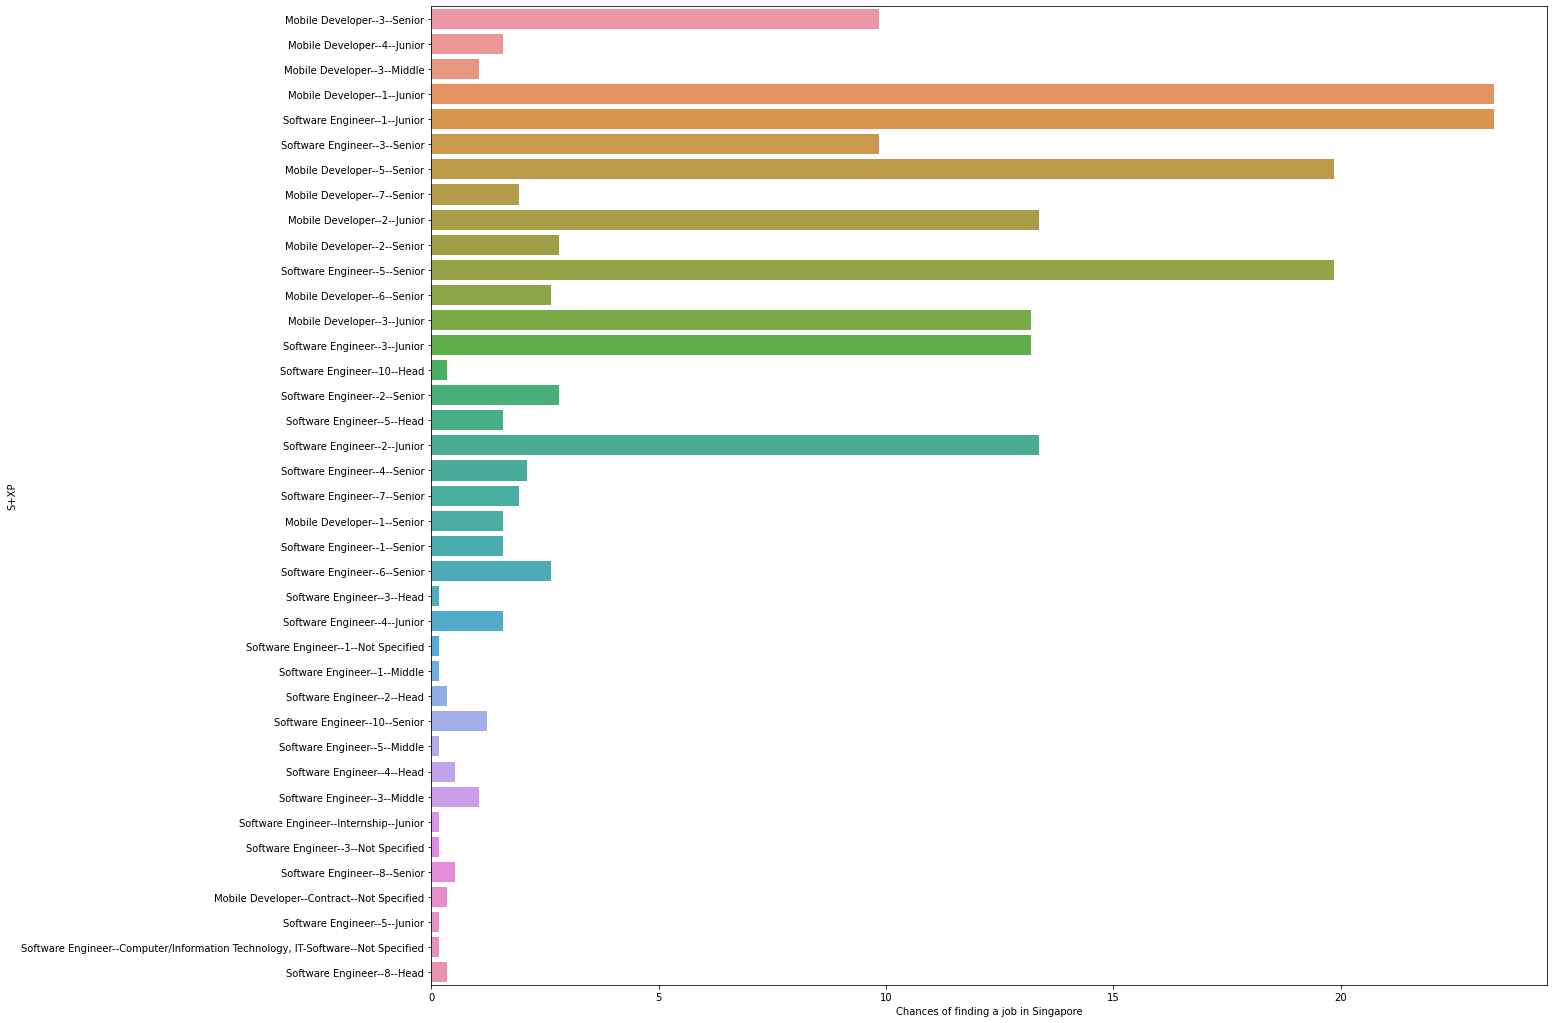

In [127]:
sns.barplot(data=r3, y='S+XP', x= 'Chances of finding a job in Singapore')

In [128]:
r3

Job Title   Career Level  \
0     Mobile Developer         Senior   
1     Mobile Developer         Junior   
2     Mobile Developer         Middle   
3     Mobile Developer         Junior   
4    Software Engineer         Junior   
5    Software Engineer         Senior   
6     Mobile Developer         Senior   
7     Mobile Developer         Middle   
8     Mobile Developer         Senior   
9     Mobile Developer         Senior   
10    Mobile Developer         Junior   
11    Mobile Developer         Senior   
12   Software Engineer         Senior   
13   Software Engineer         Junior   
14    Mobile Developer         Junior   
15   Software Engineer         Junior   
16    Mobile Developer         Junior   
17    Mobile Developer         Senior   
18    Mobile Developer         Junior   
19   Software Engineer         Junior   
20    Mobile Developer         Senior   
21    Mobile Developer         Junior   
22    Mobile Developer         Senior   
23    Mobile Developer         Senior   
24    Mobile Developer         Senior   
25   Software Engineer         Junior   
26   Software Engineer         Junior   
27   Software Engineer         Senior   
28   Software Engineer         Junior   
29   Software Engineer         Senior   
30   Software Engineer           Head   
31   Software Engineer         Junior   
32   Software Engineer         Senior   
33   Software Engineer           Head   
34   Software Engineer         Junior   
35   Software Engineer         Junior   
36   Software Engineer         Senior   
37   Software Engineer         Senior   
38   Software Engineer         Junior   
39   Software Engineer         Junior   
40   Software Engineer         Junior   
41   Software Engineer         Junior   
42   Software Engineer         Senior   
43   Software Engineer         Senior   
44   Software Engineer         Senior   
45   Software Engineer         Senior   
46   Software Engineer         Junior   
47   Software Engineer         Junior   
48   Software Engineer         Junior   
49   Software Engineer         Senior   
50   Software Engineer         Junior   
51   Software Engineer         Junior   
52    Mobile Developer         Senior   
53    Mobile Developer         Junior   
54    Mobile Developer         Middle   
55    Mobile Developer         Junior   
56   Software Engineer         Junior   
57   Software Engineer         Senior   
58    Mobile Developer         Senior   
59    Mobile Developer         Middle   
60    Mobile Developer         Senior   
61    Mobile Developer         Senior   
62    Mobile Developer         Junior   
63    Mobile Developer         Senior   
64   Software Engineer         Senior   
65   Software Engineer         Junior   
66    Mobile Developer         Junior   
67   Software Engineer         Junior   
68    Mobile Developer         Junior   
69    Mobile Developer         Senior   
70    Mobile Developer         Junior   
71   Software Engineer         Junior   
72    Mobile Developer         Senior   
73    Mobile Developer         Junior   
74    Mobile Developer         Senior   
75    Mobile Developer         Senior   
76    Mobile Developer         Senior   
77   Software Engineer         Junior   
78   Software Engineer         Junior   
79   Software Engineer         Senior   
80   Software Engineer         Junior   
81   Software Engineer         Senior   
82   Software Engineer           Head   
83   Software Engineer         Junior   
84   Software Engineer         Senior   
85   Software Engineer           Head   
86   Software Engineer         Junior   
87   Software Engineer         Junior   
88   Software Engineer         Senior   
89   Software Engineer         Senior   
90   Software Engineer         Junior   
91   Software Engineer         Junior   
92   Software Engineer         Junior   
93   Software Engineer         Junior   
94   Software Engineer         Senior   
95   Software Engineer         Senior   
96   Software Engineer         Senio

In [129]:
r4 = r3.drop(['S+XP'], axis=1)
r4

Job Title   Career Level  \
0     Mobile Developer         Senior   
1     Mobile Developer         Junior   
2     Mobile Developer         Middle   
3     Mobile Developer         Junior   
4    Software Engineer         Junior   
5    Software Engineer         Senior   
6     Mobile Developer         Senior   
7     Mobile Developer         Middle   
8     Mobile Developer         Senior   
9     Mobile Developer         Senior   
10    Mobile Developer         Junior   
11    Mobile Developer         Senior   
12   Software Engineer         Senior   
13   Software Engineer         Junior   
14    Mobile Developer         Junior   
15   Software Engineer         Junior   
16    Mobile Developer         Junior   
17    Mobile Developer         Senior   
18    Mobile Developer         Junior   
19   Software Engineer         Junior   
20    Mobile Developer         Senior   
21    Mobile Developer         Junior   
22    Mobile Developer         Senior   
23    Mobile Developer         Senior   
24    Mobile Developer         Senior   
25   Software Engineer         Junior   
26   Software Engineer         Junior   
27   Software Engineer         Senior   
28   Software Engineer         Junior   
29   Software Engineer         Senior   
30   Software Engineer           Head   
31   Software Engineer         Junior   
32   Software Engineer         Senior   
33   Software Engineer           Head   
34   Software Engineer         Junior   
35   Software Engineer         Junior   
36   Software Engineer         Senior   
37   Software Engineer         Senior   
38   Software Engineer         Junior   
39   Software Engineer         Junior   
40   Software Engineer         Junior   
41   Software Engineer         Junior   
42   Software Engineer         Senior   
43   Software Engineer         Senior   
44   Software Engineer         Senior   
45   Software Engineer         Senior   
46   Software Engineer         Junior   
47   Software Engineer         Junior   
48   Software Engineer         Junior   
49   Software Engineer         Senior   
50   Software Engineer         Junior   
51   Software Engineer         Junior   
52    Mobile Developer         Senior   
53    Mobile Developer         Junior   
54    Mobile Developer         Middle   
55    Mobile Developer         Junior   
56   Software Engineer         Junior   
57   Software Engineer         Senior   
58    Mobile Developer         Senior   
59    Mobile Developer         Middle   
60    Mobile Developer         Senior   
61    Mobile Developer         Senior   
62    Mobile Developer         Junior   
63    Mobile Developer         Senior   
64   Software Engineer         Senior   
65   Software Engineer         Junior   
66    Mobile Developer         Junior   
67   Software Engineer         Junior   
68    Mobile Developer         Junior   
69    Mobile Developer         Senior   
70    Mobile Developer         Junior   
71   Software Engineer         Junior   
72    Mobile Developer         Senior   
73    Mobile Developer         Junior   
74    Mobile Developer         Senior   
75    Mobile Developer         Senior   
76    Mobile Developer         Senior   
77   Software Engineer         Junior   
78   Software Engineer         Junior   
79   Software Engineer         Senior   
80   Software Engineer         Junior   
81   Software Engineer         Senior   
82   Software Engineer           Head   
83   Software Engineer         Junior   
84   Software Engineer         Senior   
85   Software Engineer           Head   
86   Software Engineer         Junior   
87   Software Engineer         Junior   
88   Software Engineer         Senior   
89   Software Engineer         Senior   
90   Software Engineer         Junior   
91   Software Engineer         Junior   
92   Software Engineer         Junior   
93   Software Engineer         Junior   
94   Software Engineer         Senior   
95   Software Engineer         Senior   
96   Software Engineer         Senio

In [130]:
dfkk = df

In [131]:
r4

Job Title   Career Level  \
0     Mobile Developer         Senior   
1     Mobile Developer         Junior   
2     Mobile Developer         Middle   
3     Mobile Developer         Junior   
4    Software Engineer         Junior   
5    Software Engineer         Senior   
6     Mobile Developer         Senior   
7     Mobile Developer         Middle   
8     Mobile Developer         Senior   
9     Mobile Developer         Senior   
10    Mobile Developer         Junior   
11    Mobile Developer         Senior   
12   Software Engineer         Senior   
13   Software Engineer         Junior   
14    Mobile Developer         Junior   
15   Software Engineer         Junior   
16    Mobile Developer         Junior   
17    Mobile Developer         Senior   
18    Mobile Developer         Junior   
19   Software Engineer         Junior   
20    Mobile Developer         Senior   
21    Mobile Developer         Junior   
22    Mobile Developer         Senior   
23    Mobile Developer         Senior   
24    Mobile Developer         Senior   
25   Software Engineer         Junior   
26   Software Engineer         Junior   
27   Software Engineer         Senior   
28   Software Engineer         Junior   
29   Software Engineer         Senior   
30   Software Engineer           Head   
31   Software Engineer         Junior   
32   Software Engineer         Senior   
33   Software Engineer           Head   
34   Software Engineer         Junior   
35   Software Engineer         Junior   
36   Software Engineer         Senior   
37   Software Engineer         Senior   
38   Software Engineer         Junior   
39   Software Engineer         Junior   
40   Software Engineer         Junior   
41   Software Engineer         Junior   
42   Software Engineer         Senior   
43   Software Engineer         Senior   
44   Software Engineer         Senior   
45   Software Engineer         Senior   
46   Software Engineer         Junior   
47   Software Engineer         Junior   
48   Software Engineer         Junior   
49   Software Engineer         Senior   
50   Software Engineer         Junior   
51   Software Engineer         Junior   
52    Mobile Developer         Senior   
53    Mobile Developer         Junior   
54    Mobile Developer         Middle   
55    Mobile Developer         Junior   
56   Software Engineer         Junior   
57   Software Engineer         Senior   
58    Mobile Developer         Senior   
59    Mobile Developer         Middle   
60    Mobile Developer         Senior   
61    Mobile Developer         Senior   
62    Mobile Developer         Junior   
63    Mobile Developer         Senior   
64   Software Engineer         Senior   
65   Software Engineer         Junior   
66    Mobile Developer         Junior   
67   Software Engineer         Junior   
68    Mobile Developer         Junior   
69    Mobile Developer         Senior   
70    Mobile Developer         Junior   
71   Software Engineer         Junior   
72    Mobile Developer         Senior   
73    Mobile Developer         Junior   
74    Mobile Developer         Senior   
75    Mobile Developer         Senior   
76    Mobile Developer         Senior   
77   Software Engineer         Junior   
78   Software Engineer         Junior   
79   Software Engineer         Senior   
80   Software Engineer         Junior   
81   Software Engineer         Senior   
82   Software Engineer           Head   
83   Software Engineer         Junior   
84   Software Engineer         Senior   
85   Software Engineer           Head   
86   Software Engineer         Junior   
87   Software Engineer         Junior   
88   Software Engineer         Senior   
89   Software Engineer         Senior   
90   Software Engineer         Junior   
91   Software Engineer         Junior   
92   Software Engineer         Junior   
93   Software Engineer         Junior   
94   Software Engineer         Senior   
95   Software Engineer         Senior   
96   Software Engineer         Senio

### Now, the new dataset columns' names are changed to exactly match the main one.

In [132]:
r4.rename(columns={'Job Title': 'Position ', 'Career Level': 'Seniority Level', 'XP Years': 'Total years of experience'}, inplace=True)
r4.drop(['Occurence'], axis=1, inplace=True)
r4

Position  Seniority Level  \
0     Mobile Developer          Senior   
1     Mobile Developer          Junior   
2     Mobile Developer          Middle   
3     Mobile Developer          Junior   
4    Software Engineer          Junior   
5    Software Engineer          Senior   
6     Mobile Developer          Senior   
7     Mobile Developer          Middle   
8     Mobile Developer          Senior   
9     Mobile Developer          Senior   
10    Mobile Developer          Junior   
11    Mobile Developer          Senior   
12   Software Engineer          Senior   
13   Software Engineer          Junior   
14    Mobile Developer          Junior   
15   Software Engineer          Junior   
16    Mobile Developer          Junior   
17    Mobile Developer          Senior   
18    Mobile Developer          Junior   
19   Software Engineer          Junior   
20    Mobile Developer          Senior   
21    Mobile Developer          Junior   
22    Mobile Developer          Senior   
23    Mobile Developer          Senior   
24    Mobile Developer          Senior   
25   Software Engineer          Junior   
26   Software Engineer          Junior   
27   Software Engineer          Senior   
28   Software Engineer          Junior   
29   Software Engineer          Senior   
30   Software Engineer            Head   
31   Software Engineer          Junior   
32   Software Engineer          Senior   
33   Software Engineer            Head   
34   Software Engineer          Junior   
35   Software Engineer          Junior   
36   Software Engineer          Senior   
37   Software Engineer          Senior   
38   Software Engineer          Junior   
39   Software Engineer          Junior   
40   Software Engineer          Junior   
41   Software Engineer          Junior   
42   Software Engineer          Senior   
43   Software Engineer          Senior   
44   Software Engineer          Senior   
45   Software Engineer          Senior   
46   Software Engineer          Junior   
47   Software Engineer          Junior   
48   Software Engineer          Junior   
49   Software Engineer          Senior   
50   Software Engineer          Junior   
51   Software Engineer          Junior   
52    Mobile Developer          Senior   
53    Mobile Developer          Junior   
54    Mobile Developer          Middle   
55    Mobile Developer          Junior   
56   Software Engineer          Junior   
57   Software Engineer          Senior   
58    Mobile Developer          Senior   
59    Mobile Developer          Middle   
60    Mobile Developer          Senior   
61    Mobile Developer          Senior   
62    Mobile Developer          Junior   
63    Mobile Developer          Senior   
64   Software Engineer          Senior   
65   Software Engineer          Junior   
66    Mobile Developer          Junior   
67   Software Engineer          Junior   
68    Mobile Developer          Junior   
69    Mobile Developer          Senior   
70    Mobile Developer          Junior   
71   Software Engineer          Junior   
72    Mobile Developer          Senior   
73    Mobile Developer          Junior   
74    Mobile Developer          Senior   
75    Mobile Developer          Senior   
76    Mobile Developer          Senior   
77   Software Engineer          Junior   
78   Software Engineer          Junior   
79   Software Engineer          Senior   
80   Software Engineer          Junior   
81   Software Engineer          Senior   
82   Software Engineer            Head   
83   Software Engineer          Junior   
84   Software Engineer          Senior   
85   Software Engineer            Head   
86   Software Engineer          Junior   
87   Software Engineer          Junior   
88   Software Engineer          Senior   
89   Software Engineer          Senior   
90   Software Engineer          Junior   
91   Software Engineer          Junior   
92   Software Engineer          Junior   
93   Software Engineer          Junior   
94   Software Engineer 

In [133]:
r4.rename(columns={'Seniority Level': 'Seniority level'}, inplace=True)
r4

Position  Seniority level  \
0     Mobile Developer          Senior   
1     Mobile Developer          Junior   
2     Mobile Developer          Middle   
3     Mobile Developer          Junior   
4    Software Engineer          Junior   
5    Software Engineer          Senior   
6     Mobile Developer          Senior   
7     Mobile Developer          Middle   
8     Mobile Developer          Senior   
9     Mobile Developer          Senior   
10    Mobile Developer          Junior   
11    Mobile Developer          Senior   
12   Software Engineer          Senior   
13   Software Engineer          Junior   
14    Mobile Developer          Junior   
15   Software Engineer          Junior   
16    Mobile Developer          Junior   
17    Mobile Developer          Senior   
18    Mobile Developer          Junior   
19   Software Engineer          Junior   
20    Mobile Developer          Senior   
21    Mobile Developer          Junior   
22    Mobile Developer          Senior   
23    Mobile Developer          Senior   
24    Mobile Developer          Senior   
25   Software Engineer          Junior   
26   Software Engineer          Junior   
27   Software Engineer          Senior   
28   Software Engineer          Junior   
29   Software Engineer          Senior   
30   Software Engineer            Head   
31   Software Engineer          Junior   
32   Software Engineer          Senior   
33   Software Engineer            Head   
34   Software Engineer          Junior   
35   Software Engineer          Junior   
36   Software Engineer          Senior   
37   Software Engineer          Senior   
38   Software Engineer          Junior   
39   Software Engineer          Junior   
40   Software Engineer          Junior   
41   Software Engineer          Junior   
42   Software Engineer          Senior   
43   Software Engineer          Senior   
44   Software Engineer          Senior   
45   Software Engineer          Senior   
46   Software Engineer          Junior   
47   Software Engineer          Junior   
48   Software Engineer          Junior   
49   Software Engineer          Senior   
50   Software Engineer          Junior   
51   Software Engineer          Junior   
52    Mobile Developer          Senior   
53    Mobile Developer          Junior   
54    Mobile Developer          Middle   
55    Mobile Developer          Junior   
56   Software Engineer          Junior   
57   Software Engineer          Senior   
58    Mobile Developer          Senior   
59    Mobile Developer          Middle   
60    Mobile Developer          Senior   
61    Mobile Developer          Senior   
62    Mobile Developer          Junior   
63    Mobile Developer          Senior   
64   Software Engineer          Senior   
65   Software Engineer          Junior   
66    Mobile Developer          Junior   
67   Software Engineer          Junior   
68    Mobile Developer          Junior   
69    Mobile Developer          Senior   
70    Mobile Developer          Junior   
71   Software Engineer          Junior   
72    Mobile Developer          Senior   
73    Mobile Developer          Junior   
74    Mobile Developer          Senior   
75    Mobile Developer          Senior   
76    Mobile Developer          Senior   
77   Software Engineer          Junior   
78   Software Engineer          Junior   
79   Software Engineer          Senior   
80   Software Engineer          Junior   
81   Software Engineer          Senior   
82   Software Engineer            Head   
83   Software Engineer          Junior   
84   Software Engineer          Senior   
85   Software Engineer            Head   
86   Software Engineer          Junior   
87   Software Engineer          Junior   
88   Software Engineer          Senior   
89   Software Engineer          Senior   
90   Software Engineer          Junior   
91   Software Engineer          Junior   
92   Software Engineer          Junior   
93   Software Engineer          Junior   
94   Software Engineer 

In [134]:
r4['Chances of finding a job in Singapore'].unique()

array([ 9.84182777,  1.58172232,  1.05448155, 23.37434095, 19.85940246,
        1.93321617, 13.35676626,  2.81195079,  2.63620387, 13.18101933,
        0.35149385,  2.10896309,  0.17574692,  1.23022847,  0.52724077])

In [135]:
r5 = r4.drop_duplicates()

### It is noted that the majority of the required workforces in mobile development and software engineering in Singapore do not need to have over 7 years of experience. This will definitely leave a great amount of null values in their records in the main dataset.

In [136]:
r5 #The new dataset that will be merged avoiding any duplication of complete records.

Position  Seniority level  \
0     Mobile Developer          Senior   
1     Mobile Developer          Junior   
2     Mobile Developer          Middle   
3     Mobile Developer          Junior   
4    Software Engineer          Junior   
5    Software Engineer          Senior   
8     Mobile Developer          Senior   
9     Mobile Developer          Senior   
10    Mobile Developer          Junior   
11    Mobile Developer          Senior   
12   Software Engineer          Senior   
17    Mobile Developer          Senior   
18    Mobile Developer          Junior   
25   Software Engineer          Junior   
30   Software Engineer            Head   
32   Software Engineer          Senior   
33   Software Engineer            Head   
38   Software Engineer          Junior   
42   Software Engineer          Senior   
43   Software Engineer          Senior   
125   Mobile Developer          Senior   
145  Software Engineer          Senior   
208  Software Engineer          Senior   
231  Software Engineer            Head   
241  Software Engineer          Junior   
322  Software Engineer   Not Specified   
332  Software Engineer          Middle   
393  Software Engineer            Head   
420  Software Engineer          Senior   
433  Software Engineer          Middle   
443  Software Engineer            Head   
467  Software Engineer          Middle   
486  Software Engineer          Junior   
506  Software Engineer   Not Specified   
523  Software Engineer          Senior   
527   Mobile Developer   Not Specified   
535  Software Engineer          Junior   
549  Software Engineer   Not Specified   
559  Software Engineer            Head   

                        Total years of experience  \
0                                               3   
1                                               4   
2                                               3   
3                                               1   
4                                               1   
5                                               3   
8                                               5   
9                                               7   
10                                              2   
11                                              2   
12                                              5   
17                                              6   
18                                              3   
25                                              3   
30                                             10   
32                                              2   
33                                              5   
38                                              2   
42                                              4   
43                                              7   
125                                             1   
145                                             1   
208                                             6   
231                                             3   
241                                             4   
322                                             1   
332                                             1   
393                                             2   
420                                            10   
433                                             5   
443                                             4   
467                                             3   
486                                    Internship   
506                                             3   
523                                             8   
527                                      Contract   
535                                             5   
549  Computer/Information Technology, IT-Software   
559                                             8   

     Chances of finding a job in Singapore  
0                                     9.84  
1                                     1.58  
2                                     1.05  
3                              

In [137]:
r99 = pd.merge(dfkk, r5, 'left', on=['Position ', 'Seniority level', 'Total years of experience'])
r99

Timestamp   Age  Gender                City  \
0     24/11/2020 11:14:15 26.00    Male              Munich   
1     24/11/2020 11:14:16 26.00    Male              Berlin   
2     24/11/2020 11:15:24 28.00    Male              Berlin   
3     24/11/2020 11:15:46 37.00    Male              Berlin   
4     24/11/2020 11:15:53 32.00    Male              Berlin   
5     24/11/2020 11:16:35 37.00    Male              Berlin   
6     24/11/2020 11:16:44 24.00    Male              Berlin   
7     24/11/2020 11:17:24 29.00    Male              Berlin   
8     24/11/2020 11:17:50 35.00    Male              Berlin   
9     24/11/2020 11:18:06 32.00  Female             Hamburg   
10    24/11/2020 11:18:16   NaN    Male              Berlin   
11    24/11/2020 11:18:22   NaN     NaN              Berlin   
12    24/11/2020 11:18:26 34.00    Male              Berlin   
13    24/11/2020 11:18:40 28.00    Male              Berlin   
14    24/11/2020 11:18:41 31.00    Male           Wolfsburg   
15    24/11/2020 11:18:52 29.00    Male             Hamburg   
16    24/11/2020 11:19:10 41.00    Male              Berlin   
17    24/11/2020 11:20:03 27.00    Male              Berlin   
18    24/11/2020 11:20:49 34.00    Male              Berlin   
19    24/11/2020 11:21:10 34.00    Male              Berlin   
20    24/11/2020 11:22:57 25.00    Male              Berlin   
21    24/11/2020 11:23:11 59.00    Male              Berlin   
22    24/11/2020 11:23:53 36.00    Male              Berlin   
23    24/11/2020 11:25:03 38.00    Male              Berlin   
24    24/11/2020 11:25:20 24.00    Male              Berlin   
25    24/11/2020 11:25:35   NaN    Male              Berlin   
26    24/11/2020 11:26:16 40.00    Male              Berlin   
27    24/11/2020 11:26:59 29.00    Male              Berlin   
28    24/11/2020 11:27:34 31.00    Male              Berlin   
29    24/11/2020 11:27:39 29.00  Female              Berlin   
30    24/11/2020 11:27:49 39.00    Male              Berlin   
31    24/11/2020 11:28:12 27.00    Male              Berlin   
32    24/11/2020 11:28:58 28.00  Female              Berlin   
33    24/11/2020 11:29:18 30.00    Male              Berlin   
34    24/11/2020 11:29:38 28.00    Male              Berlin   
35    24/11/2020 11:29:55 38.00    Male              Berlin   
36    24/11/2020 11:30:00 29.00    Male              Berlin   
37    24/11/2020 11:30:11 49.00    Male              Berlin   
38    24/11/2020 11:30:21 32.00    Male              Berlin   
39    24/11/2020 11:30:38 33.00  Female              Berlin   
40    24/11/2020 11:30:45 30.00    Male              Berlin   
41    24/11/2020 11:31:01 48.00    Male              Berlin   
42    24/11/2020 11:31:38 28.00  Female              Berlin   
43    24/11/2020 11:31:45 32.00    Male              Berlin   
44    24/11/2020 11:31:50 38.00  Female              Berlin   
45    24/11/2020 11:31:51 31.00    Male              Berlin   
46    24/11/2020 11:32:11 35.00    Male              Berlin   
47    24/11/2020 11:32:24 28.00  Female              Berlin   
48    24/11/2020 11:32:28 29.00  Female              Berlin   
49    24/11/2020 11:32:48 32.00    Male              Berlin   
50    24/11/2020 11:32:57 44.00    Male              Berlin   
51    24/11/2020 11:33:08   NaN    Male              Berlin   
52    24/11/2020 11:33:33 35.00    Male              Munich   
53    24/11/2020 11:33:45 33.00    Male              Munich   
54    24/11/2020 11:33:46 29.00    Male              Berlin   
55    24/11/2020 11:33:51 66.00    Male              Munich   
56    24/11/2020 11:35:25 39.00  Female              Berlin   
57    24/11/2020 11:36:44 28.00    Male              Munich   
58    24/11/2020 11:37:39 34.00    Male              Munich   
59    24/11/2020 11:37:52 34.00    Male              Munich   
60    24/11/2020 11:38:10 32.00    Male              Munich   
61    24/11/2020 11:38:14 38.00    Male           Stuttgart   
62    24/11/2020 11:38:15 32.00    Male        

### The following chart shows the demand for Europe based Software Engineers and Mobile Developers in Singapore with respect to the exact job reqirements.
### Over 20 records of SE and MD records working in Europe are in good demand as over 20% of the job offers in those fields are targeted towards them.
### While over 100 records working in those fields in Europe have less than 5% demand in Singapore.

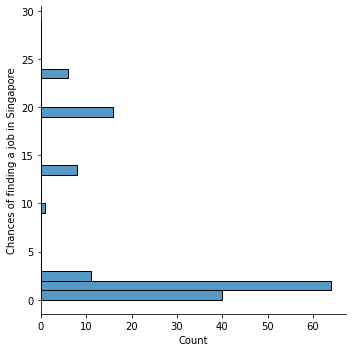

In [138]:
sns.displot(data=r99, y='Chances of finding a job in Singapore', bins=[l for l in range(30)], kind='hist')

In [139]:
r99['Chances of finding a job in Singapore'].isna().sum()

901

# ---------------------------------------------------------------------------------------------------------------

# Hypothesis Testing
## We are going to hypothesize that there is no relationship between the age of a tech employee in our dataset and his/her seniority level.

In [ ]:
dfk1 = df[['Age', 'Seniority level']]  #Extracting only the 'Age' and 'Seniority level' columns from the main dataset
dfk1

In [ ]:
dfk1.dropna(axis=0, how='any', inplace=True)
bins = (20, 30, 40, 50, 60, 70)  #Ranging the ages of employees

In [ ]:
x = pd.cut(dfk1['Age'], bins)
dfk1['Age'] = x
dfk1

In [ ]:
rows=dfk1['Age'].unique()
cols=dfk1['Seniority level'].unique()
dfk1

### Counting the duplicates number of each intersecting row and column record. Zero is returned if none is found. 

In [ ]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        l.append(len(dfk1[(dfk1['Age']==i) & (dfk1['Seniority level']==j)]))
    matrix.append(l)
matrix

In [ ]:
obsV = pd.DataFrame(matrix, index=rows, columns=cols)

In [ ]:
obsV.loc['Total']=obsV.sum()
obsV

In [ ]:
obsV['Total']=obsV.sum(axis=1)
obsV

In [ ]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(obsV.loc[i,'Total']*obsV.loc['Total',j])/obsV.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

In [ ]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

In [ ]:
obsV.drop('Total',axis=1,inplace=True)
obsV.drop('Total',axis=0,inplace=True)

In [ ]:
freeDom=(expectedF.shape[0]-1)*(expectedF.shape[1]-1)
freeDom  #The degree of freedom will be used when retrieving the chiSquare tabular value.

### Collecting and calculating the ChiSquare Table with Observed and Expected Values.

In [ ]:
obsV.values.flatten()

In [ ]:
chiScoreTable=pd.DataFrame(obsV.values.flatten(),columns=['O'])
chiScoreTable

In [ ]:
chiScoreTable['E']=expectedF.values.flatten()
chiScoreTable

In [ ]:
chiScoreTable['O-E']=chiScoreTable['O']-chiScoreTable['E']
chiScoreTable

In [ ]:
chiScoreTable['(O-E)^2']=chiScoreTable['O-E']**2
chiScoreTable

In [ ]:
chiScoreTable['((O-E)^2)\E']=chiScoreTable['(O-E)^2']/chiScoreTable['E']
chiScoreTable

### The sum of all the values in the last column is the ChiSquare value.

In [ ]:
chiScore=chiScoreTable['((O-E)^2)\E'].sum()
chiScore

In [ ]:
from scipy.stats import chi2  #Library that has chiSquare values

deg_f = 28
sig = 0.05

chi2.ppf(1-sig, deg_f)

In [ ]:
chiScore, chi2.ppf(1-sig, deg_f)

### As the resulted chiSquare value is larger than the tabular value, the hypothesis is rejected.
### That means there is a relationship between an employee's age and his/her seniority level.

# ---------------------------------------------------------------------------------------------------------------